[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/Daiki04/lecture/blob/main/chapter2.ipynb)

# 第2回：画像データの基本、画像処理アルゴリズム

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## 画像の表示

### 基礎

In [ ]:
# 画像データの読み込み
img_lenna = cv2.imread("./imgs/lenna.png")

# 画像情報の表示
print(img_lenna)

# 画像の表示
plt.imshow(img_lenna)
plt.show()


OpenCV はデフォルトで BGR (Blue, Green, Red)  
pyplot では RGB (Red, Green, Blue)

In [ ]:
# 画像データの読み込み
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2RGB)  # BGR to RGB

# 画像の表示
plt.imshow(img_lenna)
plt.show()

### 演習 2-0
OpenCV で画像を読み込み、pyplot で表示しなさい。

In [ ]:
# 画像データの読み込み
img = cv2.imread("./imgs/lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB

# 画像の表示
plt.imshow(img)
plt.show()

### HSV 色空間への変換

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

# 画像の表示（RGB空間）
plt.imshow(img_lenna)
plt.show()

HSV 色空間で何らかの操作をして RGB 空間に戻す

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna[:, :, 0] = img_lenna[:, :, 0]   # Hue (色相: 0～180)
img_lenna[:, :, 1] = img_lenna[:, :, 1]   # Saturation (彩度: 0～255)
img_lenna[:, :, 2] = img_lenna[:, :, 2]   # Value (明度: 0～255)

img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_HSV2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna)
plt.show()

### 演習 2-1 色相、彩度、明度の操作により、以下の画像に近い画像を作成しなさい。

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_hsv = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna_hsv[:, :, 0] = img_lenna_hsv[:, :, 0] + 30   # Hue (色相: 0～180)
img_lenna_hsv[:, :, 1] = img_lenna_hsv[:, :, 1] * 0.3   # Saturation (彩度: 0～255)
img_lenna_hsv[:, :, 2] = img_lenna_hsv[:, :, 2] * 1.0   # Value (明度: 0～255)

img_lenna_bgr = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_HSV2BGR)  # HSV to RGB
img_lenna_rgb = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_BGR2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna_rgb)
cv2.imwrite("./imgs/exercise2_1_1.png", img_lenna_bgr)
plt.show()

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_hsv = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2HSV)  # BGR to HSV

img_lenna_hsv[:, :, 0] = 105    # Hue (色相: 0～180)
img_lenna_hsv[:, :, 1] = 200   # Saturation (彩度: 0～255)
img_lenna_hsv[:, :, 2] = img_lenna_hsv[:, :, 2] * 0.6   # Value (明度: 0～255)

img_lenna_bgr = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_HSV2BGR)  # HSV to RGB
img_lenna_rgb = cv2.cvtColor(img_lenna_hsv, cv2.COLOR_BGR2RGB)  # HSV to RGB

# 画像の表示
plt.imshow(img_lenna_rgb)
cv2.imwrite("./imgs/exercise2_1_2.png", img_lenna_bgr)
plt.show()

In [ ]:
# 画像の結合
lenna_hsv2 = cv2.imread("./imgs/exercise2_1_1.png")
lenna_hsv3 = cv2.imread("./imgs/exercise2_1_2.png")

lenna_hsv2 = cv2.cvtColor(lenna_hsv2, cv2.COLOR_BGR2RGB)  # BGR to RGB
lenna_hsv3 = cv2.cvtColor(lenna_hsv3, cv2.COLOR_BGR2RGB)  # BGR to RGB

# 画像を並べて表示
plt.subplot(1, 2, 1)
plt.imshow(lenna_hsv2)
plt.title("Similar to image1")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(lenna_hsv3)
plt.title("Similar to image2")
# 余白無しで保存
plt.tight_layout()
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis("off")
plt.savefig("./imgs/exercise2.png", bbox_inches="tight", pad_inches=0)
plt.show()


### グレースケールへの変換

In [ ]:
# 画像データの読み込み（グレースケール化）
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 画像の表示（グレースケール表示）
plt.imshow(img_lenna)
plt.gray()
plt.show()

## 画像の保存

In [ ]:
# 画像データの読み込み（グレースケール化）
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 画像の表示（グレースケール表示）
plt.imshow(img_lenna)
plt.gray()
plt.savefig("./imgs/lenna_gray.png")
cv2.imwrite("./imgs/lenna_output.png", img_lenna)
plt.show()

## 画像のリサイズとトリミング

### 画像サイズの確認

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")

# サイズの表示
print(img_lenna.shape) # (height, width, channel) <- opencvの場合

### リサイズ

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_resize = cv2.resize(img_lenna, (64, 64))

# サイズの表示
print(img_lenna_resize.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_resize, cv2.COLOR_BGR2RGB))
plt.show()

### トリミング

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_trim = img_lenna[100:300, 100:300]

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_trim = img_lenna[128:384, 128:384]

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
plt.show()

### 演習 2-2
幅 w、高さ h のサイズの画像に対して、画像中央の 0.5w × 0.5h の領域がトリミングされるようなコードを作成しなさい。

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
H = img_lenna.shape[0]
W = img_lenna.shape[1]

img_lenna_trim = img_lenna[int(H/4):int(H*3/4), int(W/4):int(W*3/4)]

# 画像の形状の表示
print(img_lenna_trim.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
cv2.imwrite("./imgs/exercise2_2.png", img_lenna_trim)
plt.show()

### 演習 2-3
どのようなサイズの画像に対しても、中央の 128×128 ピクセルがトリミングされるようなコードを作成しなさい。 今回は 128×128 よりも小さい画像については考えなくても良いものとするが、対応したコードになっていることが好ましい。

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
H = img_lenna.shape[0]
W = img_lenna.shape[1]

if H < 128 or W < 128:
    shorter_edge = min(H, W)
    img_lenna_trim = img_lenna[int(H/2-64*shorter_edge/128):int(H/2+64*shorter_edge/128), int(W/2-64*shorter_edge/128):int(W/2+64*shorter_edge/128)]
    img_lenna_trim = cv2.resize(img_lenna_trim, (128, 128))
else:
    img_lenna_trim = img_lenna[int(H/2-64):int(H/2+64), int(W/2-64):int(W/2+64)]

# 画像の形状の表示
print(img_lenna_trim.shape) # (height, width, channel)

# 画像の表示
plt.imshow(cv2.cvtColor(img_lenna_trim, cv2.COLOR_BGR2RGB))
cv2.imwrite("./imgs/exercise2_3.png", img_lenna_trim)
plt.show()

## 二値化

In [ ]:
img_lenna = cv2.imread("./imgs/lenna.png")
img_lenna_gray = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 二値化
ret, img_lenna_gray_th = cv2.threshold(img_lenna_gray, 127, 255, cv2.THRESH_BINARY)
print(img_lenna_gray_th.shape) # (height, width)

# 画像の表示
plt.imshow(img_lenna_gray_th)
plt.gray()
plt.show()

### 演習 2-4：コインの画像またはCTデータに対し、公式ドキュメント を参考に、大津の二値化と適応的閾値処理を実装しなさい。また、それぞれの利点・欠点について考察しなさい。

In [ ]:
img_coins = cv2.imread("./imgs/coins.png")
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 二値化
ret, img_coins_gray_th = cv2.threshold(img_coins_gray, 127, 255, cv2.THRESH_BINARY)

# 大津の二値化
ret_o2, img_coins_gray_th_o2 = cv2.threshold(img_coins_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# 適応的閾値処理（平均）
img_coins_gray_th_adapt_mean = cv2.adaptiveThreshold(img_coins_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 適応的閾値処理（ガウス）
img_coins_gray_th_adapt_gauss = cv2.adaptiveThreshold(img_coins_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# 画像の表示
plt.subplot(2, 2, 1)
plt.imshow(img_coins_gray_th)
plt.axis("off")
plt.gray()
plt.title("Global threshold")
plt.subplot(2, 2, 2)
plt.imshow(img_coins_gray_th_o2)
plt.axis("off")
plt.gray()
plt.title("Otsu's method")
plt.subplot(2, 2, 3)
plt.imshow(img_coins_gray_th_adapt_mean)
plt.axis("off")
plt.gray()
plt.title("Adaptive threshold (mean)")
plt.subplot(2, 2, 4)
plt.imshow(img_coins_gray_th_adapt_gauss)
plt.axis("off")
plt.gray()
plt.title("Adaptive threshold (Gaussian)")
plt.tight_layout()
# plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis("off")
plt.savefig("./imgs/exercise2_4_coins.png", dpi=600)
plt.show()

In [ ]:
bi_coins = cv2.imread("./imgs/exercise2_4_coins.png")
bi_coins = cv2.cvtColor(bi_coins, cv2.COLOR_BGR2RGB) # BGR to RGB
bi_ct = cv2.imread("./imgs/exercise2_4_ct.png")
bi_ct = cv2.cvtColor(bi_ct, cv2.COLOR_BGR2RGB) # BGR to RGB

# 画像を並べて表示
plt.subplot(1, 2, 1)
plt.imshow(bi_coins)
plt.title("coins")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(bi_ct)
plt.title("ct")
# 余白無しで保存
plt.tight_layout()
# plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis("off")
plt.savefig("./imgs/exercise2_4.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

## フィルタ処理

In [ ]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")

# 平均値フィルタ
filter = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9
img_filtered = cv2.filter2D(img_coins, -1, filter)

# 画像の表示
plt.imshow(img_filtered)
plt.show()

In [ ]:
# 平均値フィルタ
filter_avg = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

# 4近傍鮮鋭化フィルタ
filter4 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# 8近傍鮮鋭化フィルタ
filter8 = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])

In [ ]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 平滑化フィルタ
img_filter_avg = cv2.blur(img_coins, (3, 3)) # 平均値フィルタ
img_filter_gaus = cv2.GaussianBlur(img_coins, (3, 3), 0.5) # ガウシアンフィルタ
img_filter_median = cv2.medianBlur(img_coins, 3) # メディアンフィルタ

# 画像を並べて表示
plt.subplot(2, 2, 1)
plt.imshow(img_coins)
plt.gray()
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(img_filter_avg)
plt.gray()
plt.title("Average")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(img_filter_gaus)
plt.gray()
plt.title("Gaussian")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(img_filter_median)
plt.gray()
plt.title("Median")
plt.axis("off")
plt.suptitle("Smoothing filter")
plt.savefig("./imgs/exercise2_5_sm.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

In [ ]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 4近傍鮮鋭化フィルタ(元画像と同じ画像を作るフィルタ+縦横方向のラプラシアンフィルタ)
filter4 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# 8近傍鮮鋭化フィルタ（元画像と同じ画像を作るフィルタ+全方向のラプラシアンフィルタ）
filter8 = np.array([[-1, -1,-1],
                    [-1, 9, -1],
                    [-1, -1, -1]])

# 鮮鋭化フィルタ
img_filter_sob_x = cv2.Sobel(img_coins, -1, 1, 0, ksize=3) # Sobelフィルタ: x方向
img_filter_sob_y = cv2.Sobel(img_coins, -1, 0, 1, ksize=3) # Sobelフィルタ: y方向
img_filter_sob_xy = cv2.Sobel(img_coins, -1, 1, 1, ksize=3) # Sobelフィルタ: xy方向
img_filter4 = cv2.filter2D(img_coins, -1, filter4) # 4近傍鮮鋭化フィルタ
img_filter8 = cv2.filter2D(img_coins, -1, filter8) # 8近傍鮮鋭化フィルタ

# 画像を並べて表示
plt.subplot(2, 3, 1)
plt.imshow(img_coins)
plt.gray()
plt.title("Original")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(img_filter_sob_x)
plt.gray()
plt.title("Sobel filter (x)")
plt.axis("off")
plt.subplot(2, 3, 5)
plt.imshow(img_filter_sob_y)
plt.gray()
plt.title("Sobel filter (y)")
plt.axis("off")
plt.subplot(2, 3, 6)
plt.imshow(img_filter_sob_xy)
plt.gray()
plt.title("Sobel filter (xy)")
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(img_filter4)
plt.gray()
plt.title("4-neighbors")
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(img_filter8)
plt.gray()
plt.title("8-neighbors")
plt.axis("off")
plt.suptitle("Sharpening filter")
plt.savefig("./imgs/exercise2_5_sh.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

In [ ]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# エッジ検出
img_edge_canny = cv2.Canny(img_coins, 100, 200) # Canny
img_edge_lap4 = cv2.Laplacian(img_coins, -1, ksize=1) # 4近傍ラプラシアンフィルタ
img_edge_lap8 = cv2.Laplacian(img_coins, -1, ksize=3) # 8近傍ラプラシアンフィルタ

# 画像の表示
plt.subplot(2, 2, 1)
plt.imshow(img_coins)
plt.title("Original")
plt.gray()
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(img_edge_canny)
plt.gray()
plt.title("Canny")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(img_edge_lap4)
plt.gray()
plt.title("Laplacian (4 neighbors)")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(img_edge_lap8)
plt.gray()
plt.title("Laplacian (8 neighbors)")
plt.axis("off")
plt.suptitle("Edge detection")
plt.savefig("./imgs/exercise2_5_ed.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

In [ ]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 組合せ
img_avg_sobel = cv2.Sobel(cv2.blur(img_coins, (3, 3)), -1, 1, 1, ksize=3) # Average + Sobel(xy)
img_filter_gaus_canny = cv2.Canny(cv2.GaussianBlur(img_coins, (3, 3), 0), 100, 200) # Gaussian + Canny
img_filter_4_lap = cv2.Laplacian(cv2.filter2D(img_coins, -1, filter4), -1, ksize=1) # 4-neighbors + Laplacian

# 画像を並べて表示
plt.subplot(2, 2, 1)
plt.imshow(img_coins)
plt.gray()
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(img_avg_sobel)
plt.gray()
plt.title("Average + Sobel")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(img_filter_gaus_canny)
plt.gray()
plt.title("Gaussian + Canny")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(img_filter_4_lap)
plt.gray()
plt.title("4-neighbors + Laplacian")
plt.axis("off")
# plt.tight_layout()
plt.suptitle("Combination")
plt.savefig("./imgs/exercise2_5_3.png",bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

In [ ]:
im_sm = cv2.imread("./imgs/exercise2_5_sm.png")
im_sh = cv2.imread("./imgs/exercise2_5_sh.png")
im_ed = cv2.imread("./imgs/exercise2_5_ed.png")
im_3 = cv2.imread("./imgs/exercise2_5_3.png")

im_sm = cv2.cvtColor(im_sm, cv2.COLOR_BGR2RGB) # BGR to RGB
im_sh = cv2.cvtColor(im_sh, cv2.COLOR_BGR2RGB) # BGR to RGB
im_ed = cv2.cvtColor(im_ed, cv2.COLOR_BGR2RGB) # BGR to RGB
im_3 = cv2.cvtColor(im_3, cv2.COLOR_BGR2RGB) # BGR to RGB

# 画像を並べて表示
plt.subplot(2, 2, 1)
plt.imshow(im_sm)
plt.gray()
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(im_sh)
plt.gray()
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(im_ed)
plt.gray()
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(im_3)
plt.gray()
plt.axis("off")
plt.suptitle("Filters")
plt.savefig("./imgs/exercise2_5.png", dpi=600)
plt.show()

## モルフォロジー演算

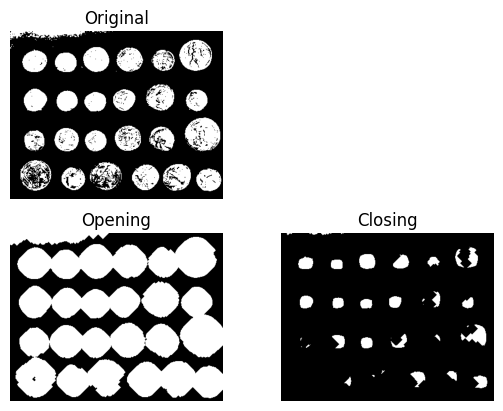

In [17]:
img_coins = cv2.imread("./imgs/coins.png")
img_coins = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 二値化
ret, img_coins = cv2.threshold(img_coins, 127, 255, cv2.THRESH_BINARY)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
img_morpho = cv2.dilate(img_coins, kernel)

def opening(img, kernel, n=10):
    for _ in range(n):
        img_opening = cv2.erode(img, kernel)
    
    for _ in range(n):
        img_opening = cv2.dilate(img_opening, kernel)
    return img_opening

def closing(img, kernel, n=10):
    for _ in range(n):
        img_closing = cv2.dilate(img, kernel)

    for _ in range(n):
        img_closing = cv2.erode(img_closing, kernel)
    return img_closing

img_coins_op = opening(img_coins, kernel)
img_coins_cl = closing(img_coins, kernel)

# 画像の表示
plt.subplot(2, 2, 1)
plt.imshow(img_coins)
plt.gray()
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(img_coins_op)
plt.gray()
plt.title("Opening")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(img_coins_cl)
plt.gray()
plt.title("Closing")
plt.axis("off")
plt.show()

## 画像の水増し

## 課題2

In [ ]:
# 平均値フィルタ
filter_avg = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

# 4近傍鮮鋭化フィルタ
filter4 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# 8近傍鮮鋭化フィルタ
filter8 = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])

Threshold: 105


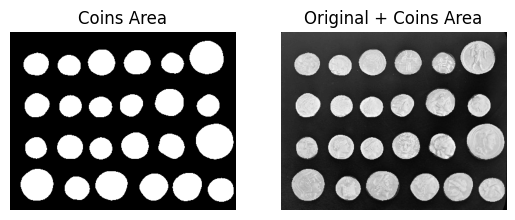

In [5]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins_or = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 平滑化：平均値フィルタ
img_coins_mean = cv2.blur(img_coins_or, (180, 180))

# 元画像 / 平均値フィルタ * 平均輝度
img_coins_mean = img_coins_or / img_coins_mean * np.mean(img_coins_or)
img_coins_mean = np.clip(img_coins_mean, 0, 255).astype(np.uint8)

# 平滑化：中央値
img_coins_median = cv2.medianBlur(img_coins_mean, 9) # 中央値フィルタ

# 平滑化：ガウスフィルタ
img_coins_gaus = cv2.GaussianBlur(img_coins_median, (5, 5), 0.0) # ガウスフィルタ

# バイラテラルフィルタ
img_coins_bil = cv2.bilateralFilter(img_coins_gaus, 9, 90, 90)

# 二値化
th = 105
img_coins_th = cv2.threshold(img_coins_bil, th, 255, cv2.THRESH_BINARY)[1]

# 重ね合わせ
img_coins_th_or = cv2.addWeighted(img_coins_or, 0.5, img_coins_th, 0.5, 0)

# 画像の表示
print("Threshold: {}".format(th))
plt.subplot(1, 2, 1)
plt.imshow(img_coins_th)
plt.gray()
plt.axis("off")
plt.title("Coins Area")
plt.subplot(1, 2, 2)
plt.imshow(img_coins_th_or)
plt.gray()
plt.axis("off")
plt.title("Original + Coins Area")
plt.savefig("./imgs/exercise2_6.png", bbox_inches="tight", pad_inches=0, dpi=600)
plt.show()

Threshold: 40


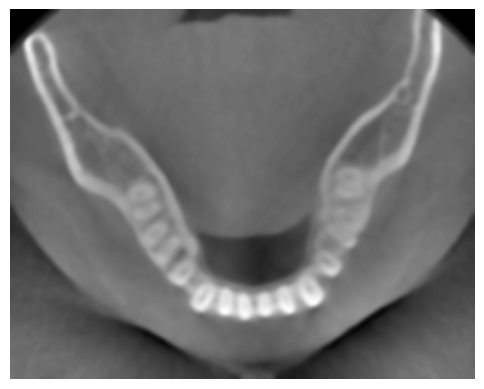

In [154]:
# 画像データの読み込み
img_coins = cv2.imread("./imgs/coins.png")
img_coins_or = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY) # BGR to GRAY

# 平滑化：中央値フィルタ
img_coins_med = cv2.blur(img_coins_or, (180, 180))

# 元画像 / 平均値フィルタ * 平均輝度
img_coins_med = img_coins_or / img_coins_med * np.mean(img_coins_or)
img_coins_med = np.clip(img_coins_med, 0, 255).astype(np.uint8)

# 平滑化：中央値
img_coins_median = cv2.medianBlur(img_coins_med, 9) # 中央値フィルタ

# 平滑化：ガウスフィルタ
img_coins_gaus = cv2.GaussianBlur(img_coins_median, (5, 5), 0.0) # ガウスフィルタ

# バイラテラルフィルタ
img_coins_bil = cv2.bilateralFilter(img_coins_gaus, 9, 90, 90)

# 適応的二値化
th = 40
img_coins_th = cv2.threshold(img_coins_bil, th, 255, cv2.THRESH_BINARY)[1]

# 重ね合わせ
img_coins_th_or = cv2.addWeighted(img_coins_or, 0.5, img_coins_th, 0.5, 0)

# 画像の表示
print("Threshold: {}".format(th))
plt.imshow(img_coins_bil)
plt.gray()
plt.axis("off")
plt.show()